# Part 1: Building a baaic NN

In [ ]:
#Academic Integrity Statement
# I certify that the code and data in this assignment were generated independently, using only
# the tools and resources defined in the course and that I did not receieve any external help,
# coaching or contributuion during the production of this work. 

In [ ]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Income dataset
Income_data = pd.read_csv('income_dataset.csv')
Income_data 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
Income_data.value_counts()

age  workclass         fnlwgt  education     education.num  marital.status      occupation         relationship   race   sex     capital.gain  capital.loss  hours.per.week  native.country  income
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
23   Private           240137  5th-6th       3              Never-married       Handlers-cleaners  Not-in-family  White  Male    0             0             55              Mexico          <=50K     2
38   Private           207202  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             48              United-States   >50K      2
30   Private           144593  HS-grad       9              Never-married       Other-service      Not-in-family  Black  Male    0             0             40              ?               <=50K     2


In [ ]:
Income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
Income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [ ]:
#Missing values
Income_data.isnull().sum(axis=0)


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
print(Income_data['workclass'].unique())
print(Income_data['occupation'].unique())
print(Income_data['native.country'].unique())


['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']


In [ ]:
df_income = Income_data[Income_data['workclass'] != '?']


In [ ]:
df_income = df_income[df_income['occupation'] != '?']

In [ ]:
df_income = df_income[df_income['native.country'] != '?']

In [ ]:
print(df_income['workclass'].unique())
print(df_income['occupation'].unique())
print(df_income['native.country'].unique())

['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'Hungary' 'Columbia' 'Guatemala'
 'El-Salvador' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Portugal' 'Laos'
 'Thailand' 'Outlying-US(Guam-USVI-etc)' 'Scotland']


In [ ]:
df_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


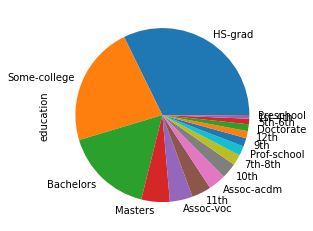

In [ ]:
#Data Visualization 
Income_data["education"].value_counts().plot(kind = 'pie')

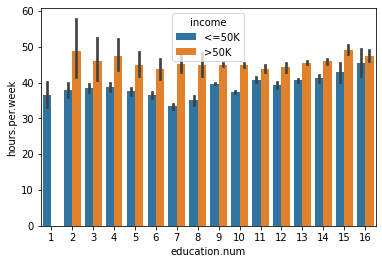

In [ ]:
sns.barplot(data = Income_data, x = 'education.num', y = 'hours.per.week', hue = 'income')

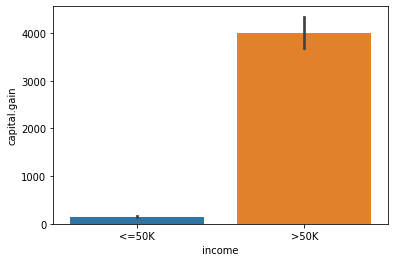

In [ ]:
sns.barplot(data = Income_data, x = 'income', y = 'capital.gain')

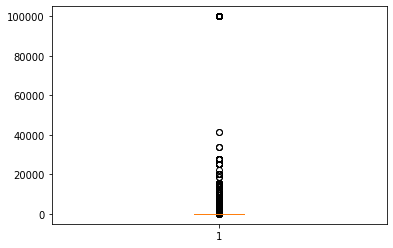

In [ ]:
plt.boxplot(df_income['capital.gain'])

plt.show()

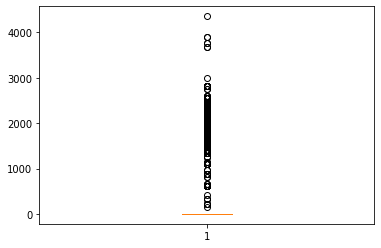

In [ ]:
plt.boxplot(df_income['capital.loss'])

plt.show()

In [ ]:
del df_income['capital.gain']
del df_income['capital.loss']

In [ ]:
df_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K


In [ ]:
## Min max scaling
lengthmin =df_income['fnlwgt'].min()
lengthmax = df_income['fnlwgt'].max()
newlist = []
for i in df_income['fnlwgt']:
    newlist.append((i-lengthmin)/(lengthmax-lengthmin))

df_income['fnlwgt'] = newlist

In [ ]:
income_onehot = pd.get_dummies(df_income, columns = ["workclass", "education", "marital.status",
                                                     "occupation","relationship", "race", "sex", 
                                                     "native.country", "income"], 
                               prefix = ["workclass", "education", "mstatus",
                                                     "occupation","relationship", "race", "sex", 
                                                     "country", "income"])

In [ ]:
df_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,0.080970,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,0.086061,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,0.170568,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,0.138072,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,0.093024,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,0.201493,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,0.165563,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,0.095589,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,0.093914,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [ ]:

income_onehot.head()

,age,fnlwgt,education.num,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,income_<=50K,income_>50K
1,82,0.080970,9,18,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,54,0.086061,4,40,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,41,0.170568,10,40,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,34,0.138072,9,45,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,38,0.093024,6,40,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
del income_onehot['income_<=50K']

In [ ]:
# Define a size for your train set 
train_size = int(0.8 * len(income_onehot))

# Split your dataset 
train_set = income_onehot[:train_size]
test_set = income_onehot[train_size:]

In [ ]:
income_array_train = train_set.to_numpy()
income_array_test = test_set.to_numpy()

In [ ]:
income_array_train.shape

(24129, 103)

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_train = income_array_train[:,0:102]
y_train = income_array_train[:,102]

X_test = income_array_test[:,0:102]
y_test = income_array_test[:,102]

In [ ]:
X_train[0]

array([8.20000000e+01, 8.09695323e-02, 9.00000000e+00, 1.80000000e+01,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
y_test

array([0., 0., 1., ..., 1., 0., 0.])

In [ ]:
def test_acc(preddata, ytest):
  result = []
  for sublist in preddata:
      for item in sublist:
          result.append(float(item))

  prediction_array = np.array(result)

  counter=0
  for l1,l2 in zip(prediction_array,y_test):
    if l1!=l2:
      counter = counter+1

  return (1-(counter/len(y_test)))*100

Epoch 1/60
2011/2011 [==============================] - 9s 3ms/step - loss: 0.5605 - accuracy: 0.7435 - val_loss: 0.4544 - val_accuracy: 0.8006
Epoch 2/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4948 - accuracy: 0.7629 - val_loss: 0.4194 - val_accuracy: 0.8236
Epoch 3/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4617 - accuracy: 0.7751 - val_loss: 0.3744 - val_accuracy: 0.8316
Epoch 4/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4410 - accuracy: 0.7843 - val_loss: 0.3940 - val_accuracy: 0.8314
Epoch 5/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4294 - accuracy: 0.7937 - val_loss: 0.3531 - val_accuracy: 0.8377
Epoch 6/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4238 - accuracy: 0.7950 - val_loss: 0.3523 - val_accuracy: 0.8371
Epoch 7/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4177 - accuracy: 0.7962 - val_loss: 0.4270 - val_accuracy:

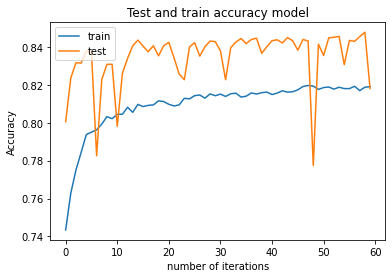

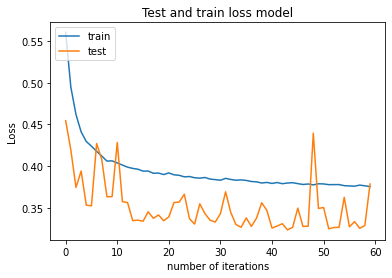


 the training accuracy for this model is : 80.91093897819519

 The test accuracy for this model is : 81.80009945300846


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))



In [ ]:
## optimizing the NN model

In [ ]:
## Changing the output activation function

In [ ]:
## tanh

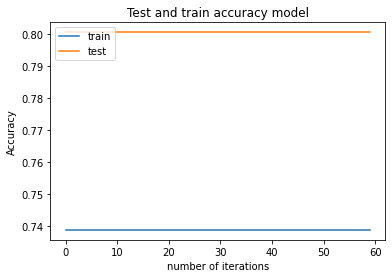

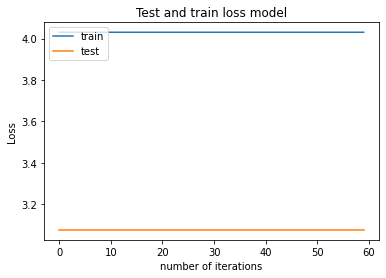


 the training accuracy for this model is : 73.86961579322815

 The test accuracy for this model is : 80.0596718050721


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))



In [ ]:
## softmax

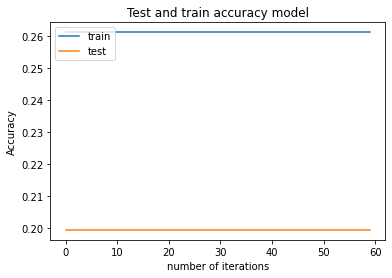

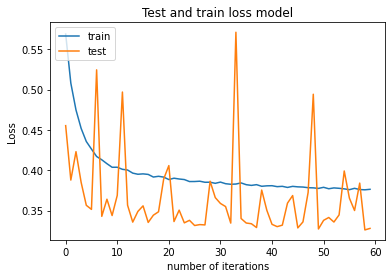


 the training accuracy for this model is : 26.130381226539612

 The test accuracy for this model is : 19.940328194927893


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))



In [ ]:
# playing around with the drop out value

In [ ]:
## drop out value 0.5

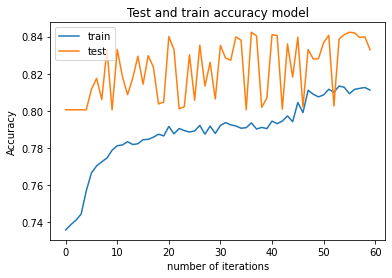

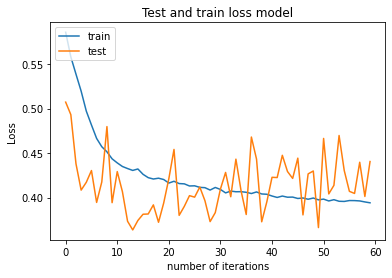


 the training accuracy for this model is : 79.48112487792969

 The test accuracy for this model is : 83.29189457981104


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))

In [ ]:
## drop out value 0.2

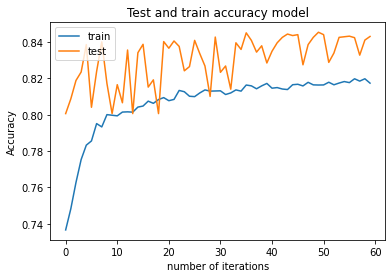

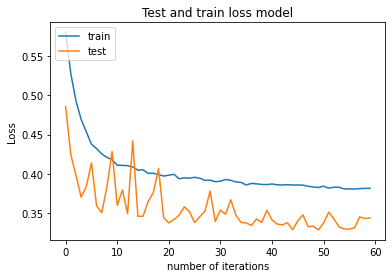


 the training accuracy for this model is : 81.79783821105957

 The test accuracy for this model is : 84.30300016575501


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))

In [ ]:
## drop out value 0.02

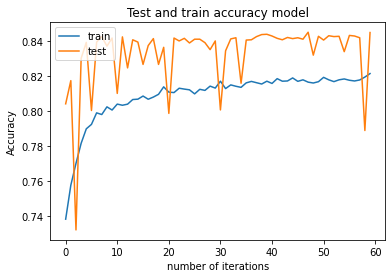

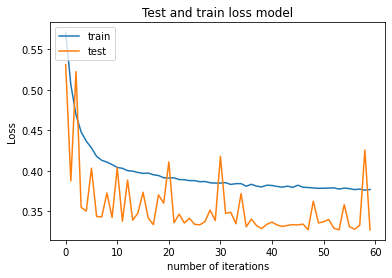


 the training accuracy for this model is : 81.99676871299744

 The test accuracy for this model is : 84.4853306812531


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))

In [ ]:
## changing the optimizer

In [ ]:
# using ADAM as optimizer

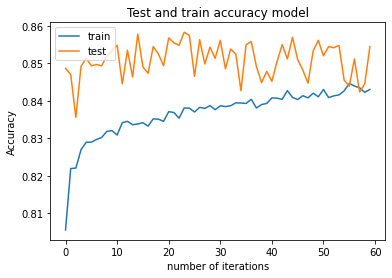

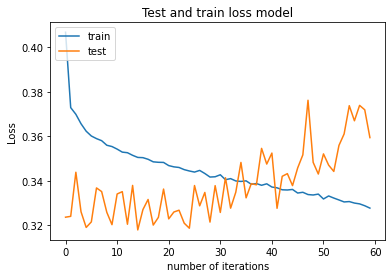


 the training accuracy for this model is : 84.57458019256592

 The test accuracy for this model is : 85.44670976297033


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))


In [ ]:
# using RMSprop as optimizer

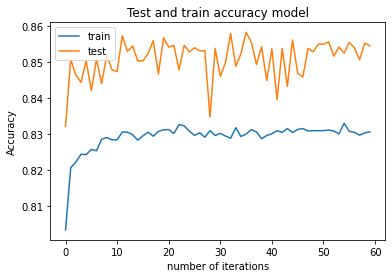

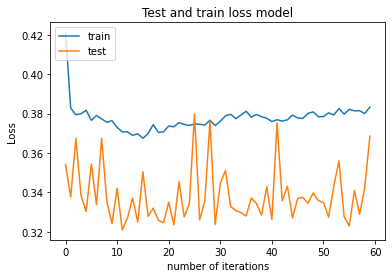


 the training accuracy for this model is : 83.76227617263794

 The test accuracy for this model is : 85.44670976297033


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))



In [ ]:
# using Nadam as optimizer

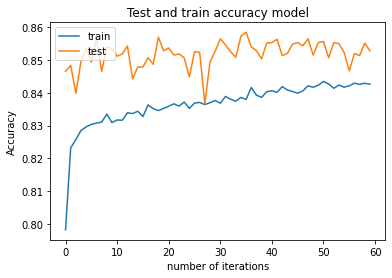

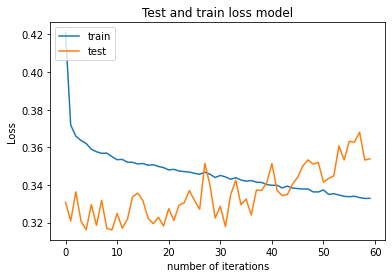


 the training accuracy for this model is : 84.54142212867737

 The test accuracy for this model is : 85.28095474888116


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))



In [ ]:
## Part 3

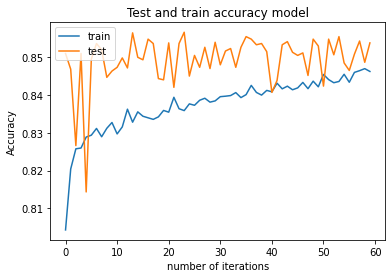

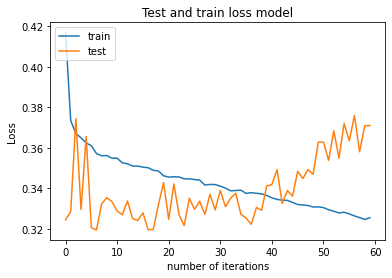


 the training accuracy for this model is : 85.00145077705383

 The test accuracy for this model is : 85.38040775733467


In [ ]:
## Base model

# Defining the keras model

## building the model
## Defining nodes, activation function
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, verbose=0)

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))


In [ ]:
#### early stopping

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist


60


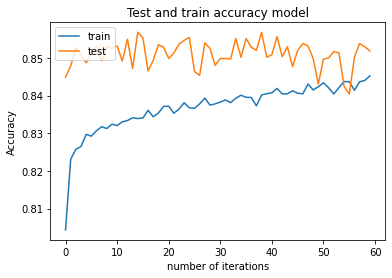

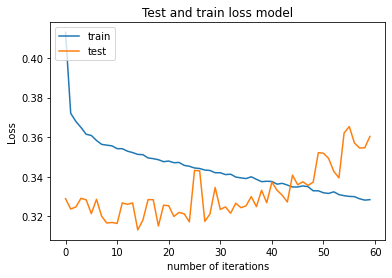


 the training accuracy for this model is : 84.23888087272644

 The test accuracy for this model is : 85.18150174042765


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential()
model.add(Dense(64, input_dim=102, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, callbacks=[callback] ,verbose=0)

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))


In [ ]:
## Adding regularization

60


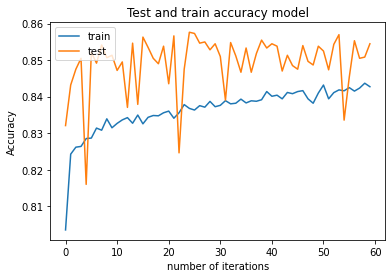

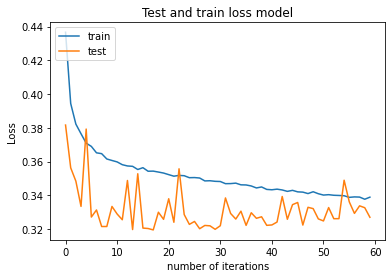


 the training accuracy for this model is : 84.50412154197693

 The test accuracy for this model is : 85.44670976297033


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential()
model.add(Dense(64, input_dim=102,activation='relu'))
model.add(Dense(32, kernel_regularizer=l2(1e-3), activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, kernel_regularizer=l2(1e-3), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, callbacks=[callback] ,verbose=0)

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))

In [ ]:
## Gradient Clipping

38


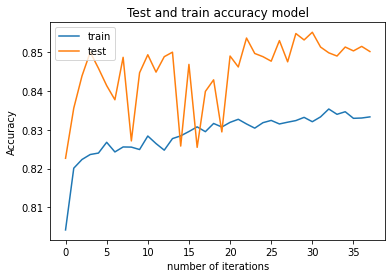

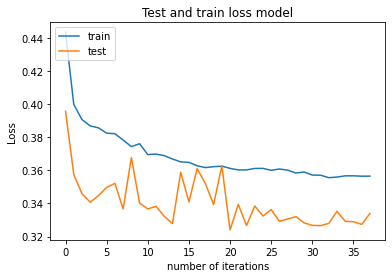


 the training accuracy for this model is : 83.85759592056274

 The test accuracy for this model is : 85.01574672633848


In [ ]:
# Defining the keras model

## building the model
## Defining nodes, activation function
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential()
model.add(Dense(64, input_dim=102,activation='relu'))
model.add(Dense(32, kernel_regularizer=l2(1e-3), activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(16, kernel_regularizer=l2(1e-3), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## defining optimizer and loss function
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Nadam(clipvalue=0.5), metrics=['accuracy'])

## fitting the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=12, callbacks=[callback] ,verbose=0)

#calculating the number of epochs run
print(len(history.history['loss']))

## plotting the accuracy model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Test and train accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

## plotting the loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test and train loss model')
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## train accuracy
_, accuracy = model.evaluate(X_train, y_train, verbose = 0)

print("\n the training accuracy for this model is : " + str(accuracy*100))

## making predictions with test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

print("\n The test accuracy for this model is : " + str(test_acc(predictions, y_test)))

In [ ]:
### Using K-Fold cross validation

Epoch 1/60
2011/2011 [==============================] - 9s 4ms/step - loss: 0.4009 - accuracy: 0.8076 - val_loss: 0.3705 - val_accuracy: 0.8258
Epoch 2/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3638 - accuracy: 0.8284 - val_loss: 0.3720 - val_accuracy: 0.8274
Epoch 3/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3576 - accuracy: 0.8291 - val_loss: 0.3596 - val_accuracy: 0.8294
Epoch 4/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3547 - accuracy: 0.8314 - val_loss: 0.3672 - val_accuracy: 0.8250
Epoch 5/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3521 - accuracy: 0.8329 - val_loss: 0.3846 - val_accuracy: 0.8081
Epoch 6/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3502 - accuracy: 0.8385 - val_loss: 0.3671 - val_accuracy: 0.8220
Epoch 7/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3488 - accuracy: 0.8348 - val_loss: 0.3575 - val_accuracy:

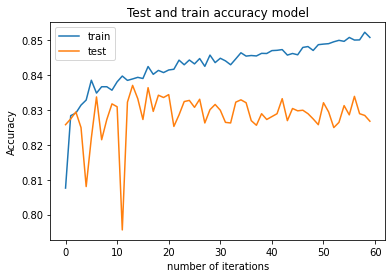

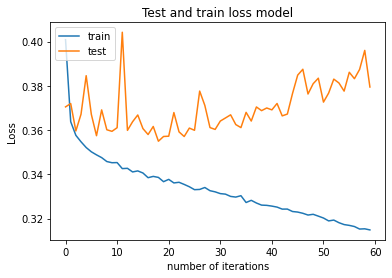

accuracy: 82.68%
Epoch 1/60
2011/2011 [==============================] - 6s 2ms/step - loss: 0.4053 - accuracy: 0.8051 - val_loss: 0.3861 - val_accuracy: 0.8243
Epoch 2/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3654 - accuracy: 0.8271 - val_loss: 0.3705 - val_accuracy: 0.8251
Epoch 3/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3605 - accuracy: 0.8305 - val_loss: 0.3659 - val_accuracy: 0.8255
Epoch 4/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3579 - accuracy: 0.8295 - val_loss: 0.3862 - val_accuracy: 0.8205
Epoch 5/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3559 - accuracy: 0.8333 - val_loss: 0.3545 - val_accuracy: 0.8261
Epoch 6/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3554 - accuracy: 0.8338 - val_loss: 0.3521 - val_accuracy: 0.8283
Epoch 7/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3513 - accuracy: 0.8343 - val_loss: 0.353

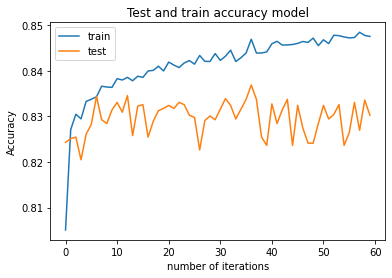

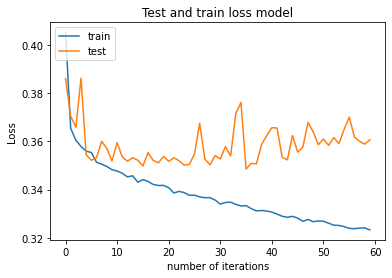

accuracy: 83.03%
Epoch 1/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4012 - accuracy: 0.8109 - val_loss: 0.3658 - val_accuracy: 0.8279
Epoch 2/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8289 - val_loss: 0.3608 - val_accuracy: 0.8334
Epoch 3/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3587 - accuracy: 0.8303 - val_loss: 0.3736 - val_accuracy: 0.8307
Epoch 4/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3561 - accuracy: 0.8313 - val_loss: 0.3718 - val_accuracy: 0.8221
Epoch 5/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8315 - val_loss: 0.3635 - val_accuracy: 0.8334
Epoch 6/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3515 - accuracy: 0.8325 - val_loss: 0.3526 - val_accuracy: 0.8329
Epoch 7/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3503 - accuracy: 0.8341 - val_loss: 0.353

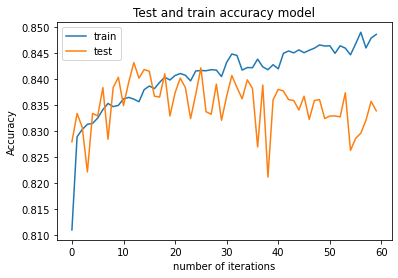

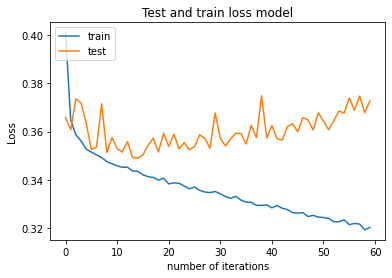

accuracy: 83.39%
Epoch 1/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4038 - accuracy: 0.8064 - val_loss: 0.3547 - val_accuracy: 0.8326
Epoch 2/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8237 - val_loss: 0.3484 - val_accuracy: 0.8430
Epoch 3/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3612 - accuracy: 0.8275 - val_loss: 0.3433 - val_accuracy: 0.8384
Epoch 4/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3598 - accuracy: 0.8286 - val_loss: 0.3483 - val_accuracy: 0.8397
Epoch 5/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3573 - accuracy: 0.8299 - val_loss: 0.3457 - val_accuracy: 0.8400
Epoch 6/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3555 - accuracy: 0.8308 - val_loss: 0.3420 - val_accuracy: 0.8476
Epoch 7/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3537 - accuracy: 0.8309 - val_loss: 0.340

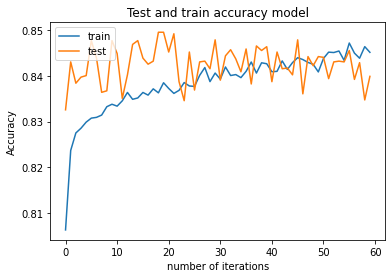

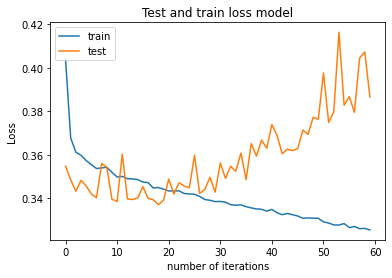

accuracy: 83.99%
Epoch 1/60
2011/2011 [==============================] - 6s 3ms/step - loss: 0.4055 - accuracy: 0.8071 - val_loss: 0.3775 - val_accuracy: 0.8210
Epoch 2/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3626 - accuracy: 0.8284 - val_loss: 0.3611 - val_accuracy: 0.8296
Epoch 3/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3580 - accuracy: 0.8306 - val_loss: 0.3716 - val_accuracy: 0.8224
Epoch 4/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3553 - accuracy: 0.8336 - val_loss: 0.3594 - val_accuracy: 0.8297
Epoch 5/60
2011/2011 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8337 - val_loss: 0.3605 - val_accuracy: 0.8306
Epoch 6/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3521 - accuracy: 0.8342 - val_loss: 0.3515 - val_accuracy: 0.8329
Epoch 7/60
2011/2011 [==============================] - 5s 2ms/step - loss: 0.3507 - accuracy: 0.8363 - val_loss: 0.357

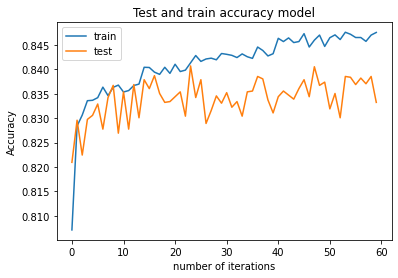

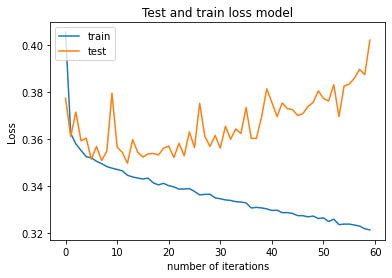

accuracy: 83.32%
83.28% (+/- 0.43%)


In [38]:
np.random.seed(123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cvscores = []

# income_onehot

X = income_onehot.to_numpy()[:,0:102]
Y = income_onehot.to_numpy()[:,102]

for train, test in kfold.split(X, Y):
  # create model
  model = Sequential()
  model.add(Dense(64, input_dim=102, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.02))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))


	# Compile model
	# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])


	# Fit the model
	# model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
  history = model.fit(X[train], Y[train], validation_data=(X[test], Y[test]),epochs=60, batch_size=12)

  ## plotting the accuracy model
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Test and train accuracy model')
  plt.ylabel('Accuracy')
  plt.xlabel('number of iterations')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  print('\n')

  ## plotting the loss model
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Test and train loss model')
  plt.ylabel('Loss')
  plt.xlabel('number of iterations')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
 

	# evaluate the model
  scores = model.evaluate(X[test], Y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))